# BLACK FRIDAY 

A retail company "ABC Private Limited" wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary ofvarious customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month. Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

### Importing data:

In [2]:
train <- read.csv("bf_train.csv", stringsAsFactors=F)

In [3]:
test <- read.csv("bf_test.csv", stringsAsFactors=F)

#### Backup:

In [4]:
train_bk <- train

In [5]:
test_bk <- test

### Exploring the data:

In [7]:
head(train)
head(test)
summary(train)
str(train)

User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1000001,P00069042,F,0-17,10,A,2,0,3,NA,NA,8370
1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
1000001,P00087842,F,0-17,10,A,2,0,12,NA,NA,1422
1000001,P00085442,F,0-17,10,A,2,0,12,14,NA,1057
1000002,P00285442,M,55+,16,C,4+,0,8,NA,NA,7969
1000003,P00193542,M,26-35,15,A,3,0,1,2,NA,15227


User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
1000004,P00128942,M,46-50,7,B,2,1,1,11,NA
1000009,P00113442,M,26-35,17,C,0,0,3,5,NA
1000010,P00288442,F,36-45,1,B,4+,1,5,14,NA
1000010,P00145342,F,36-45,1,B,4+,1,4,9,NA
1000011,P00053842,F,26-35,1,C,1,0,4,5,12
1000013,P00350442,M,46-50,1,C,3,1,2,3,15


    User_ID         Product_ID           Gender              Age           
 Min.   :1000001   Length:550068      Length:550068      Length:550068     
 1st Qu.:1001516   Class :character   Class :character   Class :character  
 Median :1003077   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1003029                                                           
 3rd Qu.:1004478                                                           
 Max.   :1006040                                                           
                                                                           
   Occupation     City_Category      Stay_In_Current_City_Years
 Min.   : 0.000   Length:550068      Length:550068             
 1st Qu.: 2.000   Class :character   Class :character          
 Median : 7.000   Mode  :character   Mode  :character          
 Mean   : 8.077                                                
 3rd Qu.:14.000                                                
 Max.   

'data.frame':	550068 obs. of  12 variables:
 $ User_ID                   : int  1000001 1000001 1000001 1000001 1000002 1000003 1000004 1000004 1000004 1000005 ...
 $ Product_ID                : chr  "P00069042" "P00248942" "P00087842" "P00085442" ...
 $ Gender                    : chr  "F" "F" "F" "F" ...
 $ Age                       : chr  "0-17" "0-17" "0-17" "0-17" ...
 $ Occupation                : int  10 10 10 10 16 15 7 7 7 20 ...
 $ City_Category             : chr  "A" "A" "A" "A" ...
 $ Stay_In_Current_City_Years: chr  "2" "2" "2" "2" ...
 $ Marital_Status            : int  0 0 0 0 0 0 1 1 1 1 ...
 $ Product_Category_1        : int  3 1 12 12 8 1 1 1 1 8 ...
 $ Product_Category_2        : int  NA 6 NA 14 NA 2 8 15 16 NA ...
 $ Product_Category_3        : int  NA 14 NA NA NA NA 17 NA NA NA ...
 $ Purchase                  : int  8370 15200 1422 1057 7969 15227 19215 15854 15686 7871 ...


The available information are User_ID, Product_ID,	Gender.	Age,	Occupation,	City_Category,	Stay_In_Current_City_Years,	Marital_Status,	Product_Category_1,	Product_Category_2,	Product_Category_3,	Purchase in the train dataset and same information is available in the test dataset except the Purchase. So now, we have to use the train dataset to predict the purchase of our test data set

### Let's check if our dataset contain any NA values:

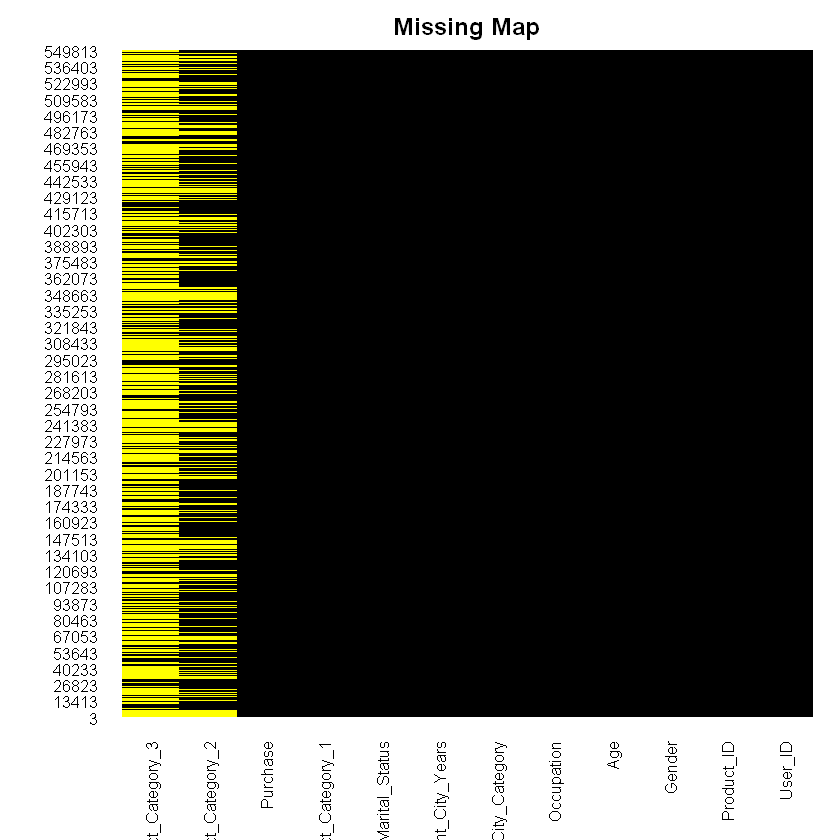

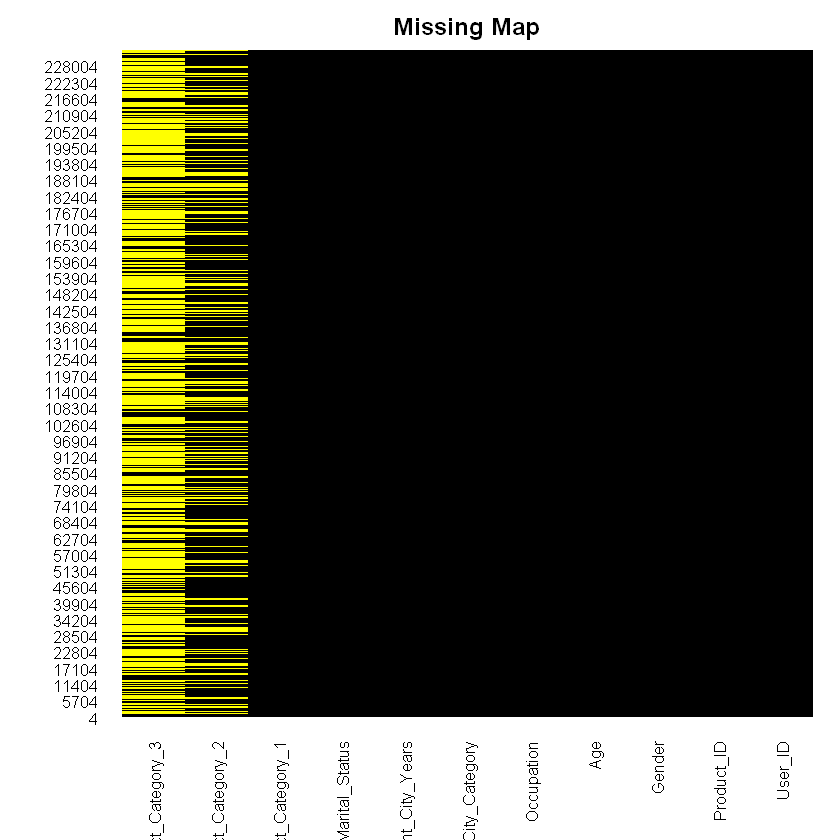

In [8]:
library(Amelia)
missmap(train, main='Missing Map',col=c('yellow','black'),legend=FALSE)
missmap(test, main='Missing Map',col=c('yellow','black'),legend=FALSE)

From the graph we can say that 90% of product category 3 and 75% of product category 2 data are missing.

### Looking for the missing value:

In [7]:
library(DMwR)
train <- centralImputation(train)
test <- centralImputation(test)

In [6]:
for(i in 1:12){
  ans = any(is.na(train[,i]))
  col = colnames(train[,i])
  print(paste(col,'=',ans))
}

[1] " = FALSE"
[1] " = FALSE"
[1] " = FALSE"
[1] " = FALSE"
[1] " = FALSE"
[1] " = FALSE"
[1] " = FALSE"
[1] " = FALSE"
[1] " = FALSE"
[1] " = FALSE"
[1] " = FALSE"
[1] " = FALSE"


Now, our data is complete and there are no NA's in it. Lets proceed further.

## Unvirate Analysis

To get an idea of the distribution of numerical variables, histograms are an excellent starting point.
Let’s begin by generating one for Purchase , our target variable.


### Distribution of target variable:Purchase

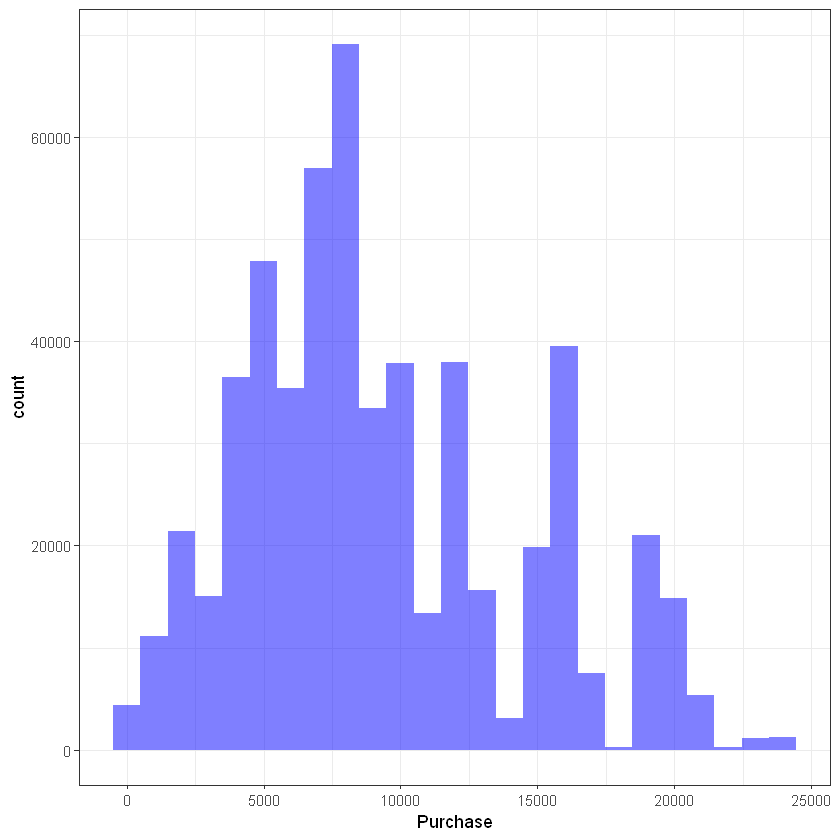

In [13]:
library(ggplot2)
ggplot(train, aes(Purchase)) + geom_histogram(bins=25,fill='blue',alpha=0.5) + theme_bw()

It seems like our target variable has an almost Gaussian distribution.

### Numerical Predictors
Now that we’ve analysed our target variable, let’s consider our predictors. Let’s start by seeing which of our features are numeric.

#### Distribution of the variable: Occupation

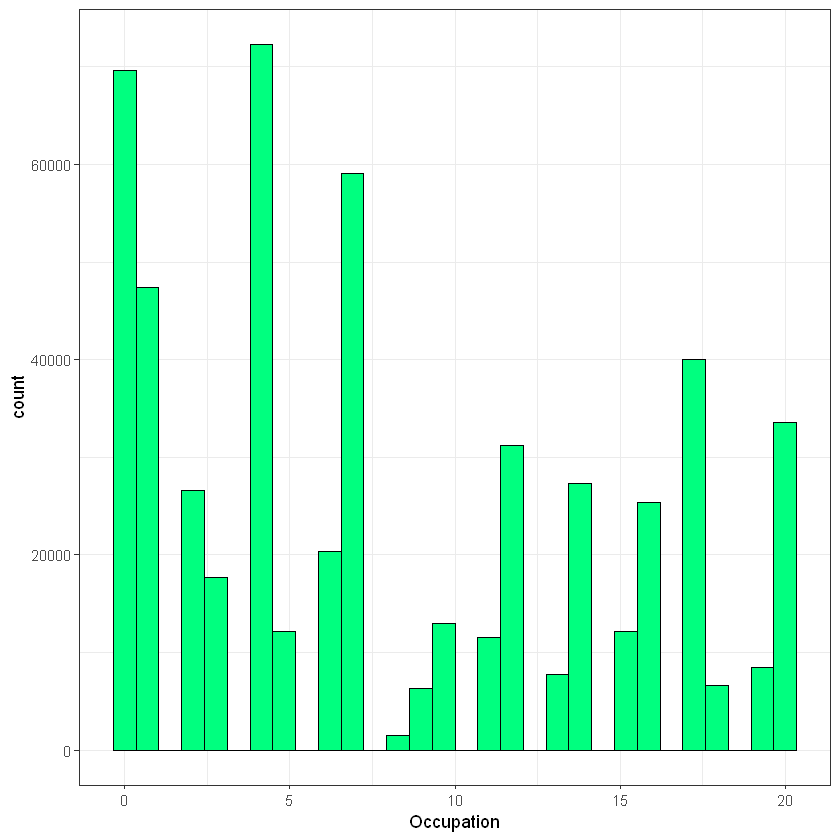

In [14]:
ggplot(train,aes(Occupation)) + geom_histogram(bins=30,color="black",fill="#00FF7F") + theme_bw()

As seen in the beginning, Occupation has at least 20 different values. Since we do not known to each occupation each number corresponds, is difficult to make any analysis. Furthermore, it seems we have no alternative but to use since there is no way to reduce this number as we did on Project Bigmart with Item_Type.

#### Distribution of variable: Marital Status

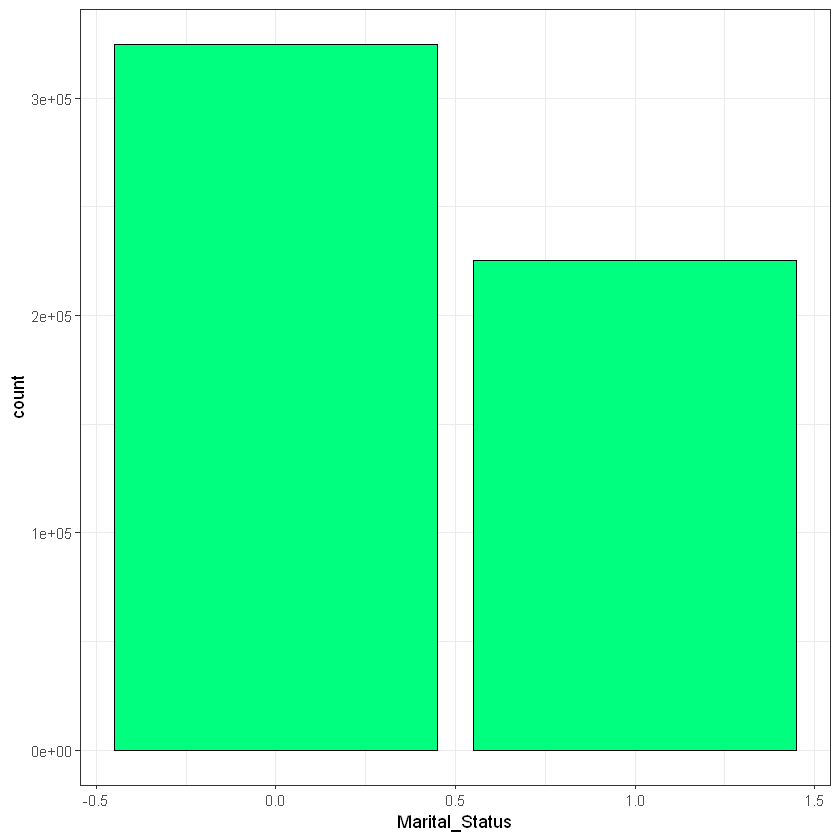

In [15]:
ggplot(train,aes(Marital_Status)) + geom_bar(color="black",fill="#00FF7F") + theme_bw()

As expected there are more single people buying products on Black Friday than married people, but do they spend more?

#### Distribution of variable: Product Category 1

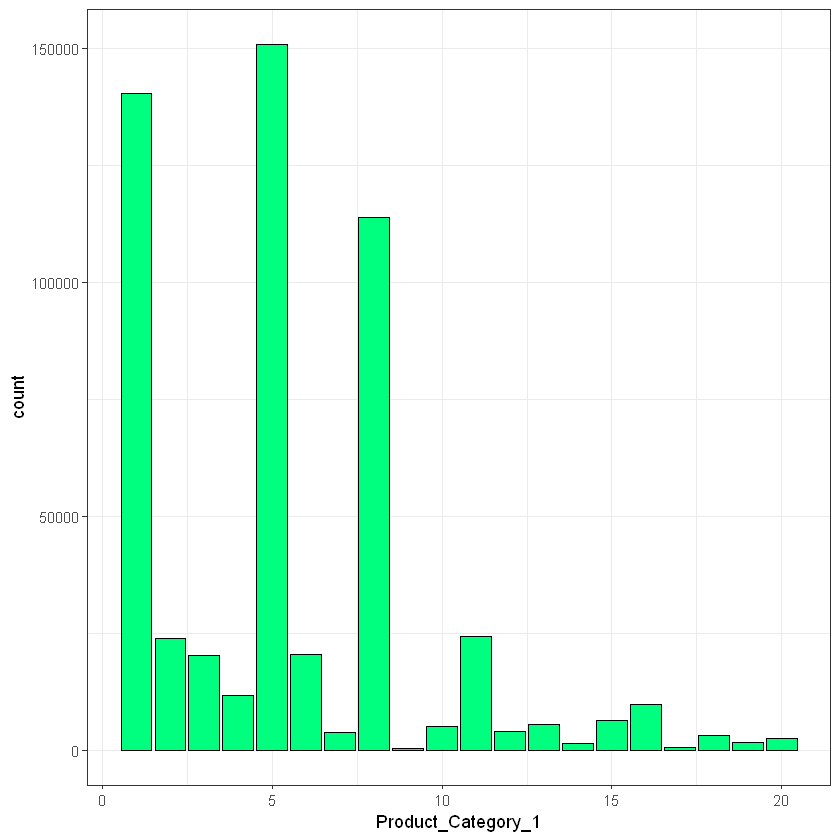

In [16]:
ggplot(train,aes(Product_Category_1)) + geom_bar(color="black",fill="#00FF7F") + theme_bw()

From the distribution for products from category one, it is clear that three products stand out, number 1, 5 and 8. Unfortunately, we do not know which product each number represents.

#### Distribution of variable: Product Category 2

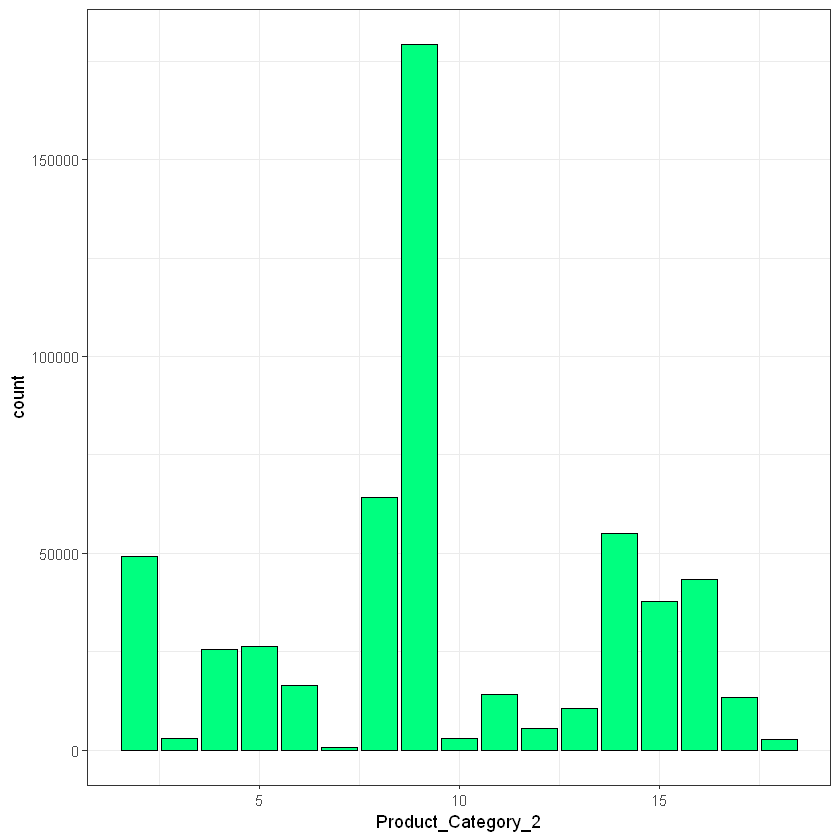

In [17]:
ggplot(train,aes(Product_Category_2)) + geom_bar(color="black",fill="#00FF7F") + theme_bw()

#### Distribution of variable: Product Category 3

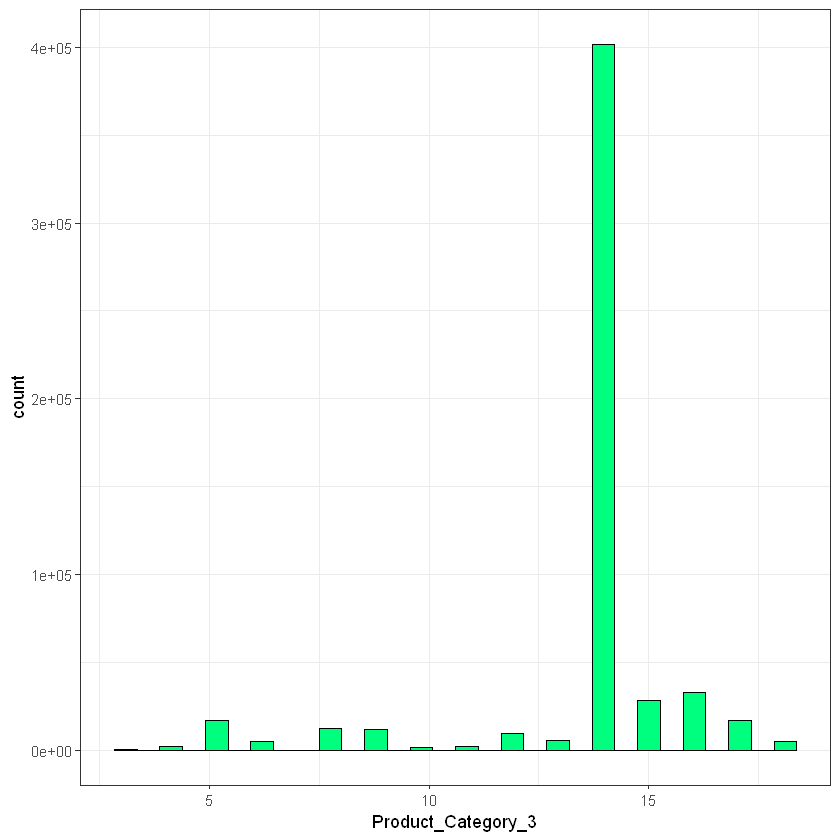

In [18]:
ggplot(train,aes(Product_Category_3)) + geom_histogram(bins=30,color="black",fill="#00FF7F") + theme_bw()

### Correlation between Numerical Predictors and Target variable

                        User_ID    Occupation Marital_Status Product_Category_1
User_ID             1.000000000 -0.0239707219   0.0204426432        0.003824614
Occupation         -0.023970722  1.0000000000   0.0242799611       -0.007617560
Marital_Status      0.020442643  0.0242799611   1.0000000000        0.019887854
Product_Category_1  0.003824614 -0.0076175597   0.0198878542        1.000000000
Product_Category_2  0.001644216  0.0005565642   0.0115259150        0.331691477
Product_Category_3  0.001008212  0.0043253120   0.0127054254        0.195929867
Purchase            0.004715662  0.0208326169  -0.0004633764       -0.343703346
                   Product_Category_2 Product_Category_3      Purchase
User_ID                  0.0016442162        0.001008212  0.0047156616
Occupation               0.0005565642        0.004325312  0.0208326169
Marital_Status           0.0115259150        0.012705425 -0.0004633764
Product_Category_1       0.3316914765        0.195929867 -0.3437033459
Produ

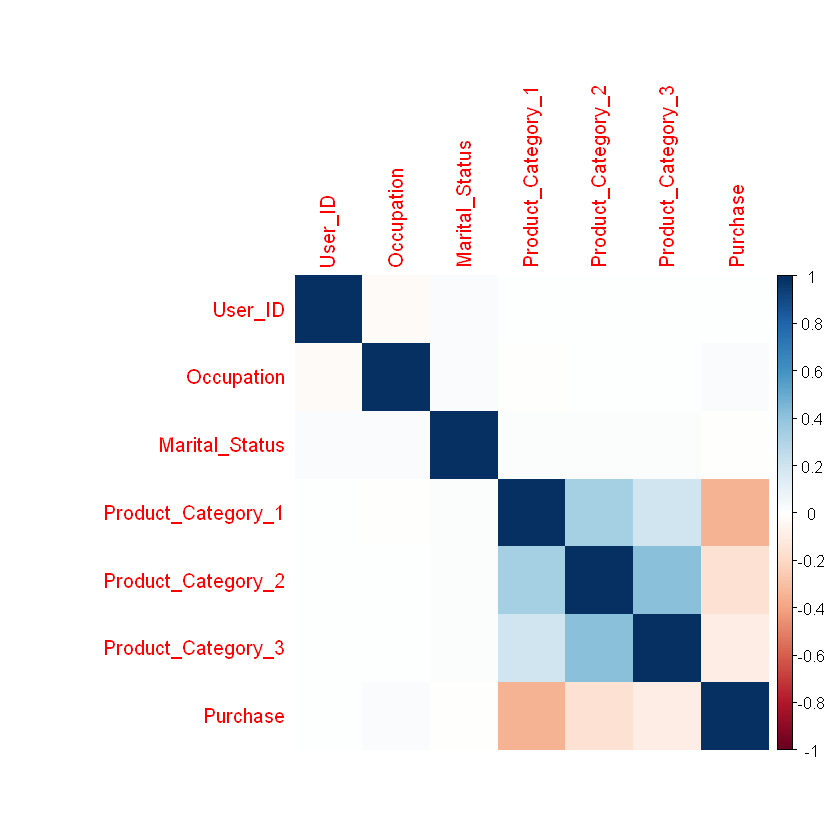

In [20]:
#Numeric cokumn only
num.cols <- sapply(train,is.numeric)
#filter
cor.data <- cor(train[,num.cols])
library(corrplot)
#corrplot
print(corrplot(cor.data,method='color')) 

There seems to be no multicollinearity with our predictors which is a good thing, although there is some correlation among the product categories.

### Categorical Predictor
For categorical variables, bar charts and frequency counts are the natural counterparts to histograms. Now is time to look at the variables that contain some insight on the assumptions previously made.

#### Distribution of variable: Gender

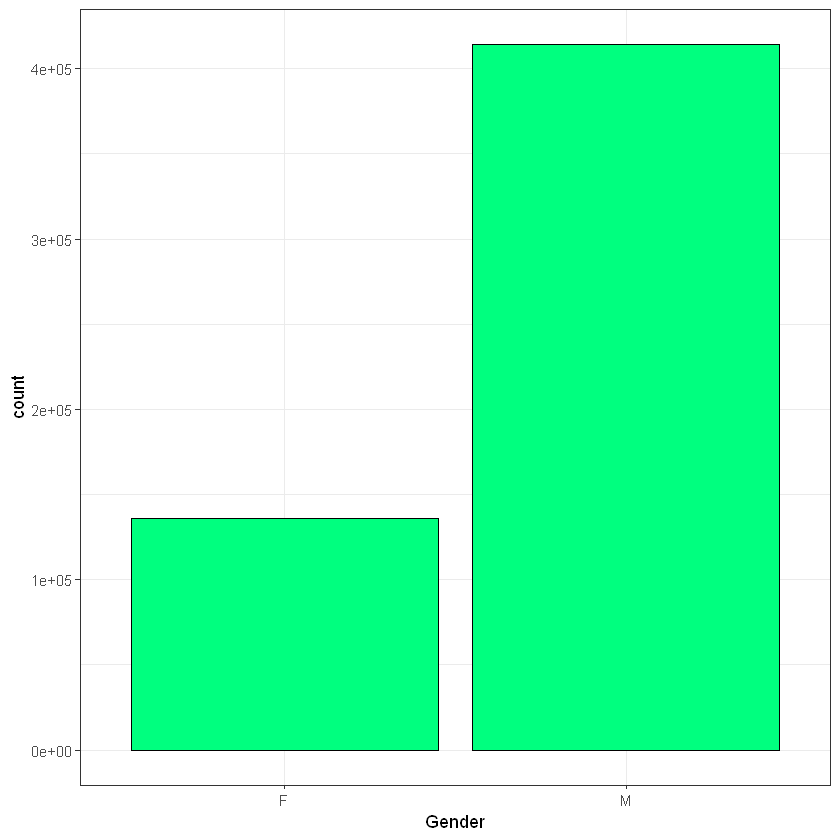

In [21]:
ggplot(train,aes(Gender)) + geom_bar(color="black",fill="#00FF7F") + theme_bw()

Most of the buyers are males, but who spends more on each purchase: man or woman?

#### Distribution of variable: Age

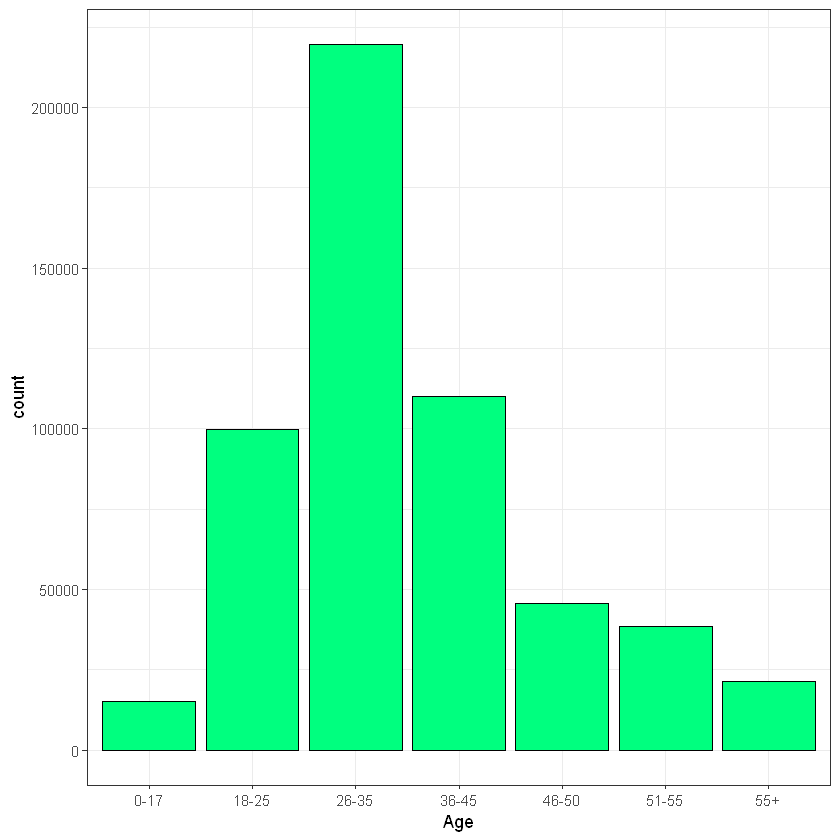

In [22]:
ggplot(train,aes(Age)) + geom_bar(color="black",fill="#00FF7F") + theme_bw()

As expected, most purchases are made by people between 18 to 45 years old.

#### Distribution of variable: City Category

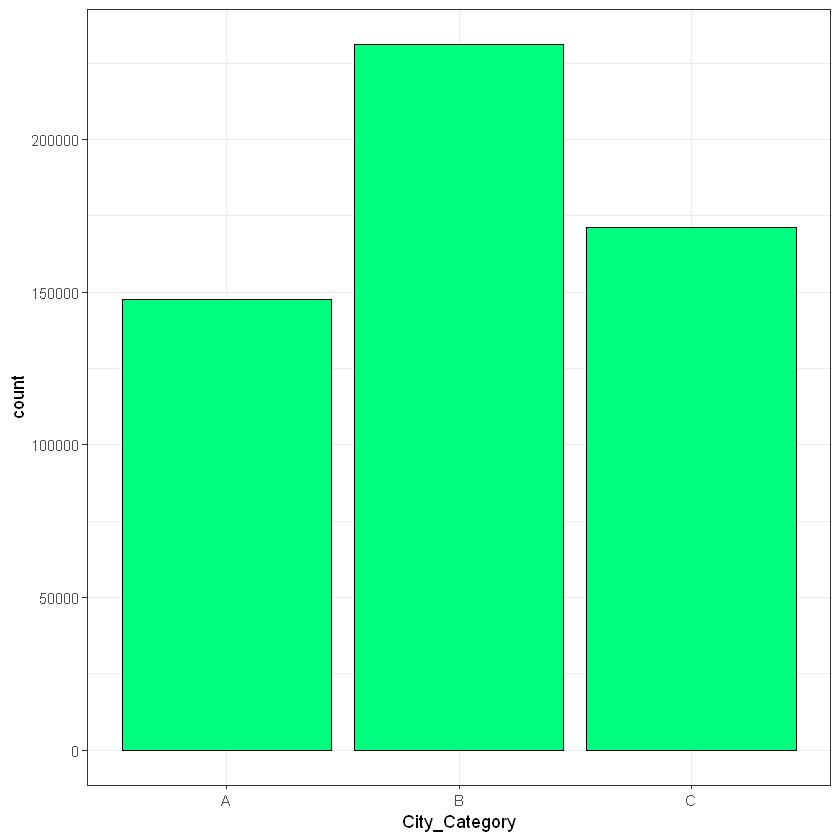

In [23]:
ggplot(train,aes(City_Category)) + geom_bar(color="black",fill="#00FF7F") + theme_bw()

Supposing ‘A’ represents the biggest city whereas ‘C’ the smallest, it curious to see that the medium size cities ‘B’ had higher sales than the others. But do they also spent more?

#### Distribution of variable: Status in current city years

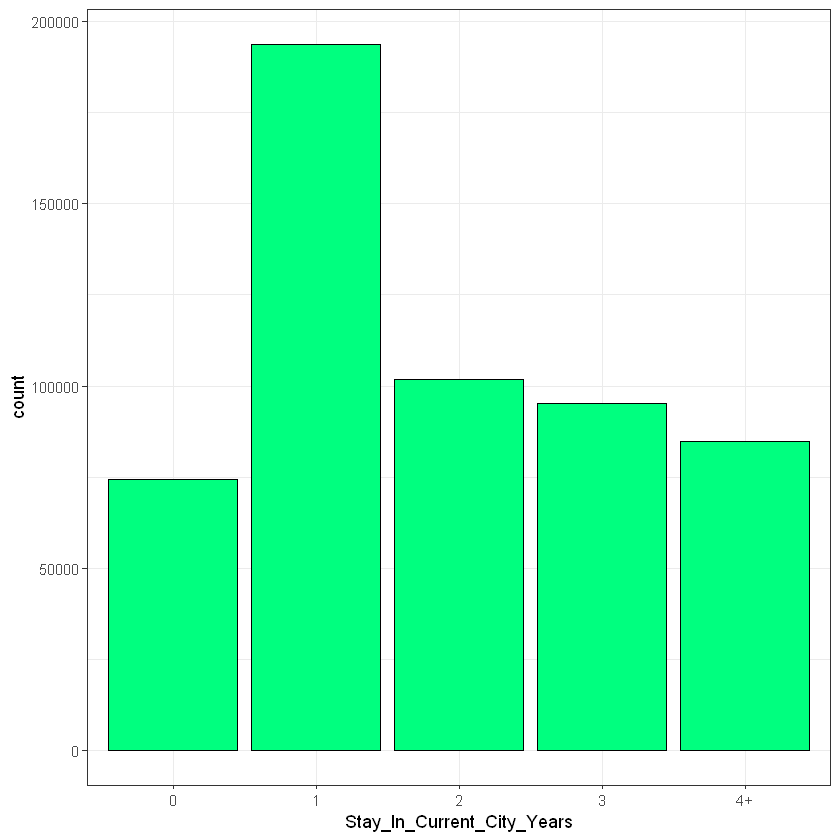

In [24]:
ggplot(train,aes(Stay_In_Current_City_Years)) + geom_bar(color="black",fill="#00FF7F") + theme_bw()

The tendency looks like the longest someone is living in that city the less prone they are to buy new things. Hence, if someone is new in town and needs a great number of new things for their house that they’ll take advantage of the low prices in Black Friday to purchase all the things needed.

## Biverate Analysis
Firstly we individually analysed some of the existent features, now it is time to understand the relationship between our target variable and predictors as well as the relationship among predictors.

### Numerical Variables

#### Occupation and Purchase Analysis

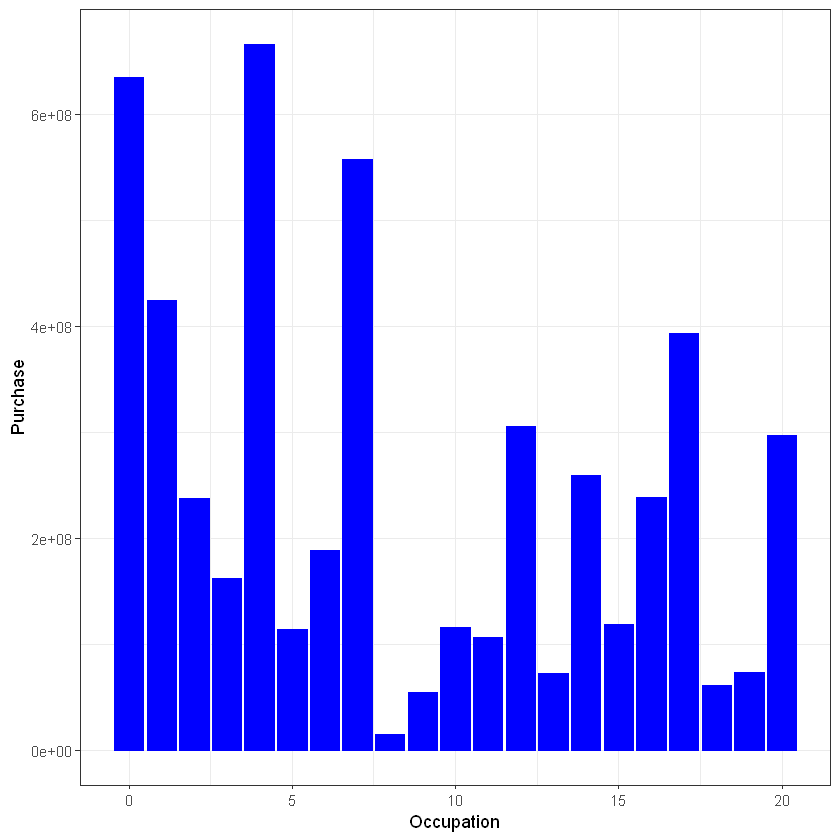

In [26]:
ggplot(train,aes(Occupation,Purchase)) + geom_bar(stat = "identity",color="blue") + theme_bw()

#### Marital Status and Purchase analysis

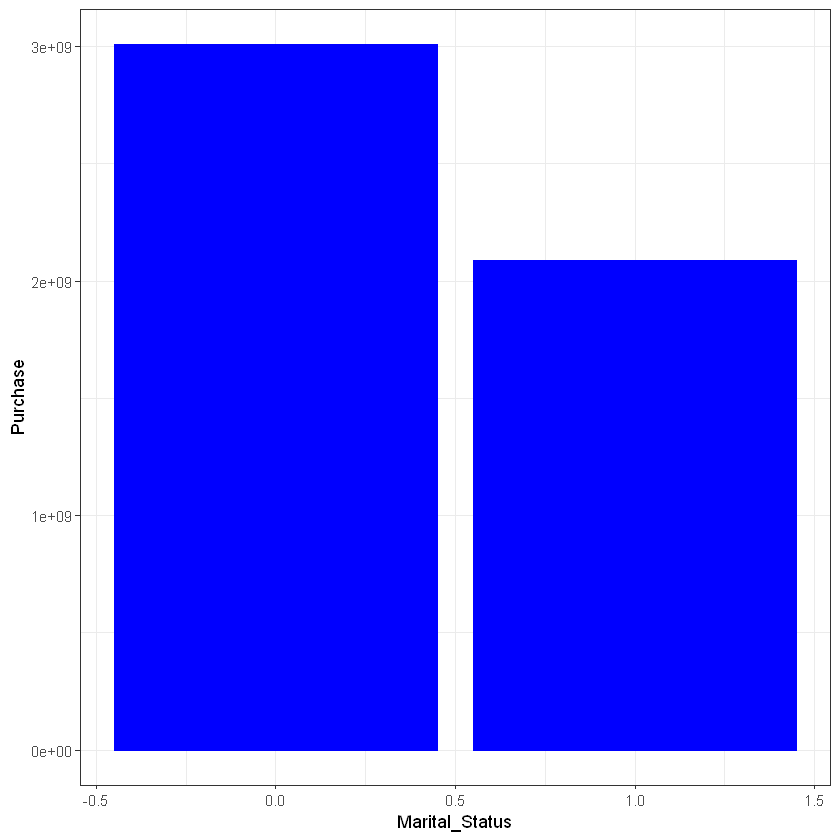

In [27]:
ggplot(train,aes(Marital_Status,Purchase)) + geom_bar(stat = "identity",color="blue") + theme_bw()

#### Product category 1 and Purchase analysis

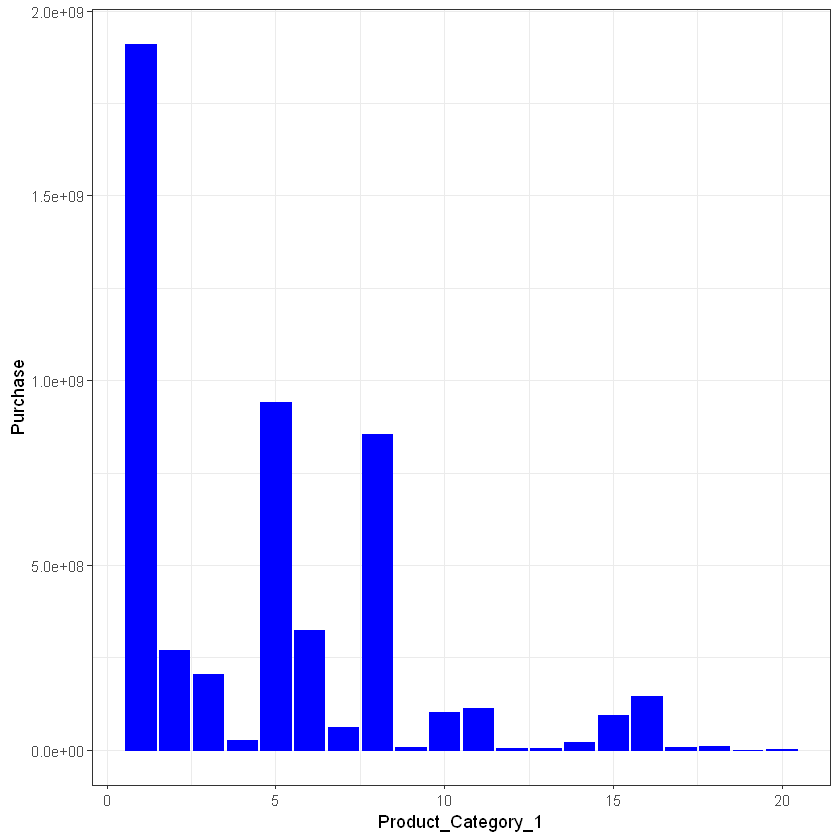

In [28]:
ggplot(train,aes(Product_Category_1,Purchase)) + geom_bar(stat = "identity",color="blue") + theme_bw()

### Categorical Variables

#### Gender and Puchase Analysis

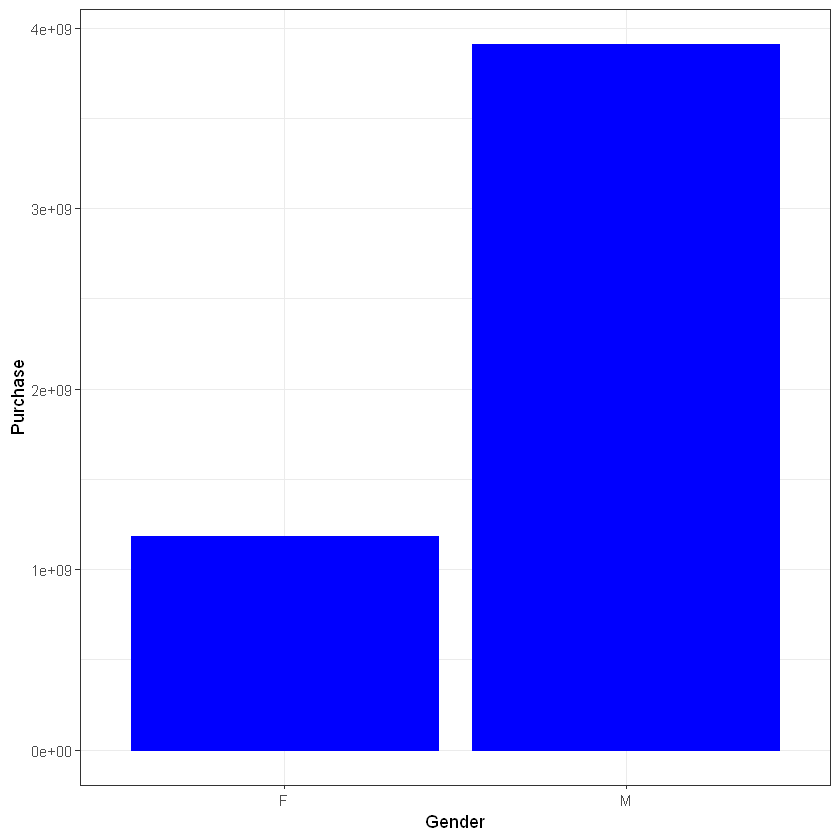

In [29]:
ggplot(train,aes(Gender,Purchase)) + geom_bar(stat = "identity",color="blue") + theme_bw()

#### Age and Purchase Analysis

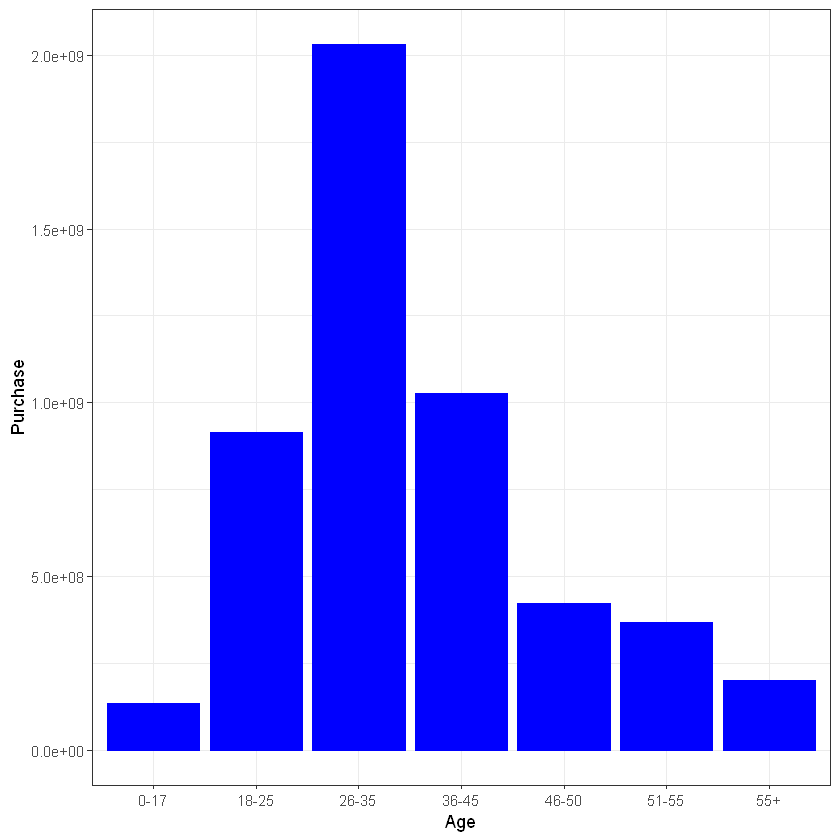

In [29]:
ggplot(train,aes(Age,Purchase)) + geom_bar(stat = "identity",color="blue") + theme_bw()

#### City Category and Purchase Analysis

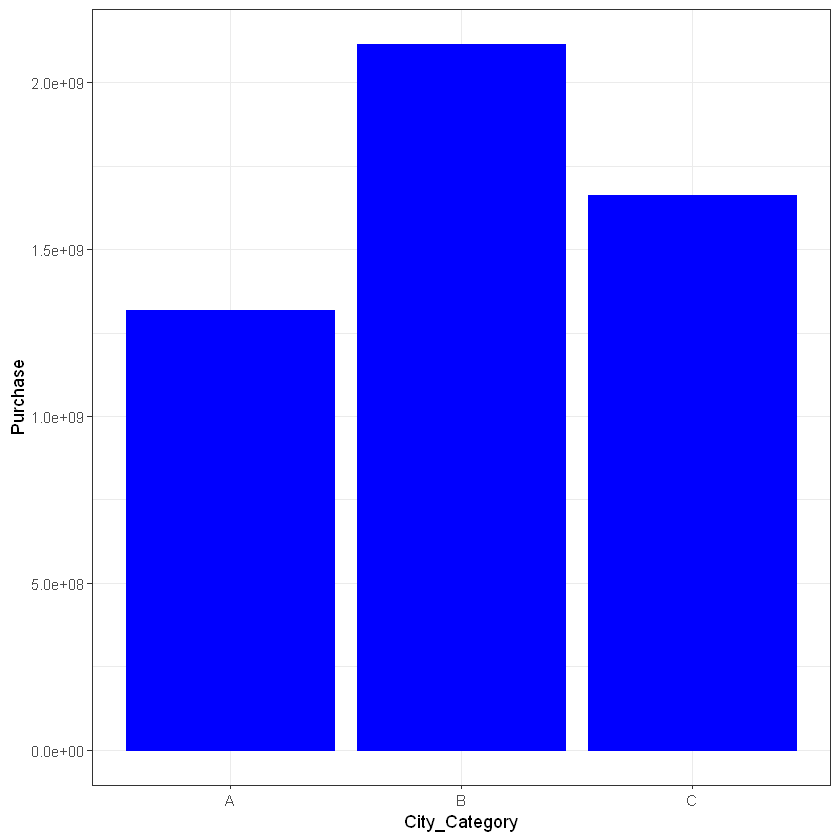

In [30]:
ggplot(train,aes(City_Category,Purchase)) + geom_bar(stat ="identity",color="blue") + theme_bw()

#### Stay In Current City Years and Purchase analysis

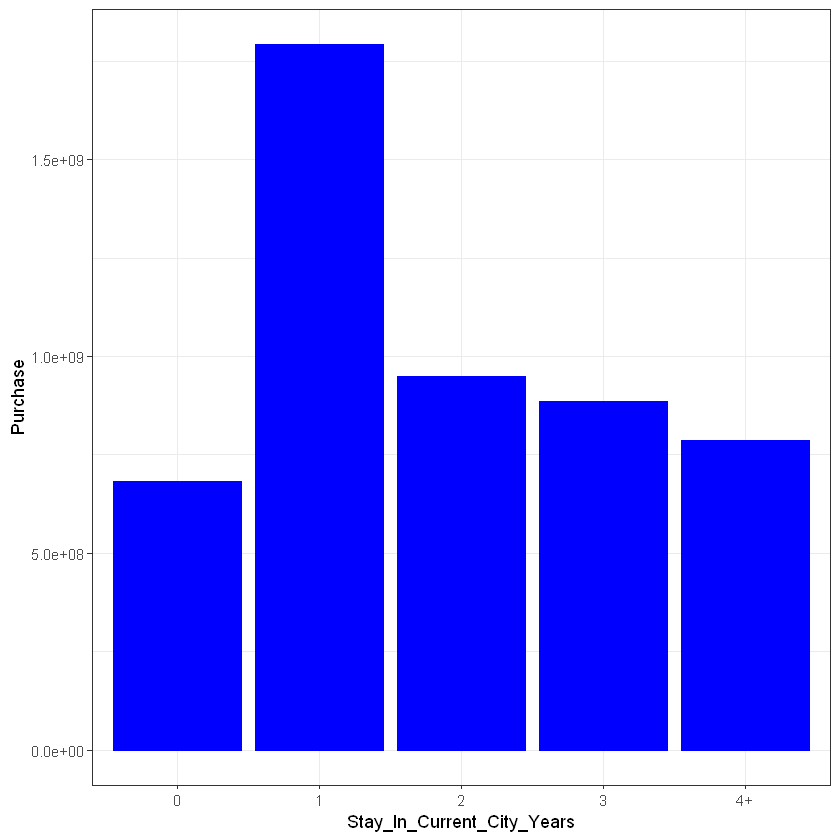

In [31]:
ggplot(train,aes(Stay_In_Current_City_Years,Purchase)) + geom_bar(stat="identity",color="blue") + theme_bw()

## MODELLING

In [11]:
# Cleaning data
library(RCurl)
library(dummies)
library(plyr)

In [12]:
head(train)
head(test)

User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1000001,P00069042,F,0-17,10,A,2,0,3,9,14,8370
1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
1000001,P00087842,F,0-17,10,A,2,0,12,9,14,1422
1000001,P00085442,F,0-17,10,A,2,0,12,14,14,1057
1000002,P00285442,M,55+,16,C,4+,0,8,9,14,7969
1000003,P00193542,M,26-35,15,A,3,0,1,2,14,15227


User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
1000004,P00128942,M,46-50,7,B,2,1,1,11,14
1000009,P00113442,M,26-35,17,C,0,0,3,5,14
1000010,P00288442,F,36-45,1,B,4+,1,5,14,14
1000010,P00145342,F,36-45,1,B,4+,1,4,9,14
1000011,P00053842,F,26-35,1,C,1,0,4,5,12
1000013,P00350442,M,46-50,1,C,3,1,2,3,15


In [13]:
# Converting stay in current city years into numeric
train$Stay_In_Current_City_Years[train$Stay_In_Current_City_Years == "4+"] <- "4" 
test$Stay_In_Current_City_Years[test$Stay_In_Current_City_Years == "4+"] <- "4"

train$Stay_In_Current_City_Years <- as.numeric(train$Stay_In_Current_City_Years)
test$Stay_In_Current_City_Years <- as.numeric(test$Stay_In_Current_City_Years)

In [15]:
# onehot-encoding city variable
train <- dummy.data.frame(train, names=c("City_Category"), sep="_")
test <- dummy.data.frame(test, names=c("City_Category"),sep="_")

In [16]:
# converting age variable to numeric
train$Age[train$Age == "0-17"] <- "15"
train$Age[train$Age == "18-25"] <- "21"
train$Age[train$Age == "26-35"] <- "30"
train$Age[train$Age == "36-45"] <- "40"
train$Age[train$Age == "46-50"] <- "48"
train$Age[train$Age == "51-55"] <- "53"
train$Age[train$Age == "55+"] <- "60"

test$Age[test$Age == "0-17"] <- "15"
test$Age[test$Age == "18-25"] <- "21"
test$Age[test$Age == "26-35"] <- "30"
test$Age[test$Age == "36-45"] <- "40"
test$Age[test$Age == "46-50"] <- "48"
test$Age[test$Age == "51-55"] <- "53"
test$Age[test$Age == "55+"] <- "60"

train$Age <- as.integer(train$Age)
test$Age <- as.integer(test$Age)

In [17]:
# converting gender to binary
train$Gender <- ifelse(train$Gender == "F", 1, 0)
test$Gender <- ifelse(test$Gender == "F", 1, 0)

In [18]:
# feature representing the count of each user
user_count <- ddply(train, .(User_ID), nrow)
names(user_count)[2] <- "User_Count"
train <- merge(train, user_count, by="User_ID")
test <- merge(test, user_count, all.x=T, by="User_ID")

In [19]:
# feature representing the count of each product
product_count <- ddply(train, .(Product_ID), nrow)
names(product_count)[2] <- "Product_Count"
train <- merge(train, product_count, by="Product_ID")
test <- merge(test, product_count, all.x=T, by="Product_ID")
any(is.na(test$Product_Count))
test$Product_Count[is.na(test$Product_Count)] <- 0

[1] TRUE

In [20]:
#removing unnecessary column form train and test
train <- train[3:16]
test <- test[3:15]

In [21]:
head(train,n=10)
head(test,n=10)

Gender,Age,Occupation,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_Count,Product_Count
0,30,7,0,1,0,1,1,3,4,5,13642,197,1152
0,40,20,0,1,0,4,0,3,4,5,8335,171,1152
0,21,19,1,0,0,1,0,3,4,5,13374,39,1152
1,21,1,0,0,1,1,1,3,4,5,10883,51,1152
0,30,0,0,1,0,0,1,3,4,5,10843,282,1152
1,15,10,0,0,1,2,0,3,4,5,11041,129,1152
1,21,1,0,1,0,0,1,3,4,5,13206,287,1152
0,40,0,0,0,1,1,0,3,4,5,10568,73,1152
0,40,17,0,0,1,1,0,3,4,5,13578,62,1152
0,21,20,0,0,1,1,0,3,4,5,10784,175,1152


Gender,Age,Occupation,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,User_Count,Product_Count
0,48,14,0,0,1,4,1,3,4,5,120,1152
1,40,20,0,1,0,3,0,3,4,5,363,1152
0,15,0,0,1,0,1,0,3,4,5,46,1152
0,21,4,0,0,1,3,1,3,4,5,56,1152
1,53,6,0,1,0,3,0,3,4,5,502,1152
1,40,12,0,1,0,2,1,3,4,5,166,1152
0,30,16,0,0,1,1,1,3,4,5,112,1152
0,30,2,0,1,0,1,0,3,4,5,149,1152
0,30,17,0,0,1,3,0,3,4,5,93,1152
0,30,17,1,0,0,2,0,3,4,5,190,1152


In [ ]:
train[-12] <- scale(train[-12])
test <- scale(test)
head(train)
head(test)

## XGBoost

In [32]:
# Splitting dataset
library(caTools)
set.seed(101)
split = sample.split(train$Purchase, SplitRatio = 0.8)
training_set = subset(train, split == TRUE)
test_set = subset(train, split == FALSE)

In [33]:
head(training_set,n=10)
head(test_set,n=10)

Gender,Age,Occupation,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_Count,Product_Count
-0.5725691,-0.3834178,-0.1650717,-0.6059242,1.1745051,-0.6721427,-0.6657276,1.2004532,-0.6108082,-1.319546,-3.653469,13642,-0.1108568,1.930671
-0.5725691,0.5217883,1.8279800,-0.6059242,1.1745051,-0.6721427,1.6608592,-0.8330172,-0.6108082,-1.319546,-3.653469,8335,-0.2594018,1.930671
-0.5725691,-1.1981032,1.6746684,1.6503683,-0.8514209,-0.6721427,-0.6657276,-0.8330172,-0.6108082,-1.319546,-3.653469,13374,-1.0135533,1.930671
1.7465109,-1.1981032,-1.0849418,-0.6059242,-0.8514209,1.4877766,-0.6657276,1.2004532,-0.6108082,-1.319546,-3.653469,10883,-0.9449941,1.930671
-0.5725691,-0.3834178,-1.2382535,-0.6059242,1.1745051,-0.6721427,-1.4412565,1.2004532,-0.6108082,-1.319546,-3.653469,10843,0.3747710,1.930671
1.7465109,-1.7412269,0.2948633,-0.6059242,-0.8514209,1.4877766,0.1098013,-0.8330172,-0.6108082,-1.319546,-3.653469,11041,-0.4993591,1.930671
1.7465109,-1.1981032,-1.0849418,-0.6059242,1.1745051,-0.6721427,-1.4412565,1.2004532,-0.6108082,-1.319546,-3.653469,13206,0.4033373,1.930671
-0.5725691,0.5217883,-1.2382535,-0.6059242,-0.8514209,1.4877766,-0.6657276,-0.8330172,-0.6108082,-1.319546,-3.653469,10568,-0.8193022,1.930671
-0.5725691,0.5217883,1.3680450,-0.6059242,-0.8514209,1.4877766,-0.6657276,-0.8330172,-0.6108082,-1.319546,-3.653469,13578,-0.8821481,1.930671
-0.5725691,-1.1981032,1.8279800,-0.6059242,-0.8514209,1.4877766,-0.6657276,-0.8330172,-0.6108082,-1.319546,-3.653469,10784,-0.2365488,1.930671


,Gender,Age,Occupation,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_Count,Product_Count
14,-0.5725691,-1.1981032,-0.6250068,-0.6059242,1.1745051,-0.6721427,0.1098013,-0.8330172,-0.6108082,-1.319546,-3.653469,13354,-0.9907002,1.930671
15,-0.5725691,-0.3834178,-0.1650717,-0.6059242,1.1745051,-0.6721427,0.8853302,-0.8330172,-0.6108082,-1.319546,-3.653469,13594,0.5518823,1.930671
27,-0.5725691,-0.3834178,0.9081100,-0.6059242,1.1745051,-0.6721427,0.1098013,-0.8330172,-0.6108082,-1.319546,-3.653469,13649,-0.7107501,1.930671
29,1.7465109,-1.7412269,0.2948633,-0.6059242,-0.8514209,1.4877766,-0.6657276,-0.8330172,-0.6108082,-1.319546,-3.653469,10780,-0.9678472,1.930671
36,-0.5725691,1.2459531,0.6014866,-0.6059242,1.1745051,-0.6721427,0.8853302,1.2004532,-0.6108082,-1.319546,-3.653469,13704,-0.8764349,1.930671
37,1.7465109,0.5217883,-0.1650717,1.6503683,-0.8514209,-0.6721427,1.6608592,1.2004532,-0.6108082,-1.319546,-3.653469,13614,-0.1565630,1.930671
49,1.7465109,-0.3834178,-0.7783184,1.6503683,-0.8514209,-0.6721427,0.8853302,-0.8330172,-0.6108082,-1.319546,-3.653469,13449,2.0316189,1.930671
51,-0.5725691,1.2459531,-1.0849418,-0.6059242,1.1745051,-0.6721427,-0.6657276,-0.8330172,-0.6108082,-1.319546,-3.653469,10935,1.1174959,1.930671
52,-0.5725691,0.5217883,-0.1650717,-0.6059242,1.1745051,-0.6721427,0.1098013,-0.8330172,-0.6108082,-1.319546,-3.653469,8011,-0.9964135,1.930671
56,-0.5725691,0.5217883,-0.3183834,-0.6059242,-0.8514209,1.4877766,-0.6657276,1.2004532,-0.6108082,-1.319546,-3.653469,13287,-0.8821481,1.930671


In [38]:
# Fitting XGBoost to the Training set
# install.packages('xgboost')
library(xgboost)
model_X = xgboost(data = as.matrix(training_set[-12]), label = training_set$Purchase, nrounds = 100)

# Predicting the Test set results
y_predX = predict(model_X, newdata = as.matrix(test_set[-12]))
head(y_predX,n=10)

[1]	train-rmse:7658.208984 
[2]	train-rmse:5734.727051 
[3]	train-rmse:4495.583496 
[4]	train-rmse:3754.638184 
[5]	train-rmse:3323.639893 
[6]	train-rmse:3089.620117 
[7]	train-rmse:2946.941895 
[8]	train-rmse:2876.735596 
[9]	train-rmse:2832.124023 
[10]	train-rmse:2804.943848 
[11]	train-rmse:2790.642822 
[12]	train-rmse:2780.256836 
[13]	train-rmse:2774.291992 
[14]	train-rmse:2770.184570 
[15]	train-rmse:2763.536865 
[16]	train-rmse:2758.240723 
[17]	train-rmse:2752.966064 
[18]	train-rmse:2747.686523 
[19]	train-rmse:2744.581543 
[20]	train-rmse:2740.189209 
[21]	train-rmse:2735.930664 
[22]	train-rmse:2732.334961 
[23]	train-rmse:2728.497559 
[24]	train-rmse:2726.815674 
[25]	train-rmse:2721.825439 
[26]	train-rmse:2719.653564 
[27]	train-rmse:2717.352783 
[28]	train-rmse:2716.227051 
[29]	train-rmse:2715.280273 
[30]	train-rmse:2712.790527 
[31]	train-rmse:2709.069580 
[32]	train-rmse:2705.806152 
[33]	train-rmse:2702.874023 
[34]	train-rmse:2700.908936 
[35]	train-rmse:2698.80

[1] 11268.332 11218.239 11105.303 11368.030 11049.953 12287.715  9893.901
 [8] 11117.835 11267.905 11066.392

In [39]:
# Making the RMSE
rmse_X <- sqrt(mean((test_set$Purchase-y_predX)^2))
rmse_X

[1] 2601.016

###### We got a root mean squarred of 2601.01582860056 using XGBoost.

#### New Improved XGBoost model

In [40]:
X_features <- c( "Gender" ,                   
                 "Age" , "Occupation" ,  "City_Category_A" ,
                 "City_Category_B" , "City_Category_C" ,
                 "Stay_In_Current_City_Years" , "Product_Category_1" ,       
                 "Product_Category_2" , "Product_Category_3" ,
                 "User_Count" , "Product_Count")
X_target <- training_set$Purchase
xgtrain <- xgb.DMatrix(data = as.matrix(training_set[,X_features]), label = X_target, missing = NA)
xgtest <- xgb.DMatrix(data =as.matrix(test_set[,X_features]), missing=NA)

In [41]:
#Setting Parameters
params <- list()
params$objective <- "reg:linear"
params$eta <- 0.23
params$max_depth <- 10
params$subsample <- 1
params$colsample_bytree <- 1
params$min_child_weight <- 2
params$eval_metric <- "rmse"

In [42]:
#Model building 
model_xgb <- xgb.train(params <- params, xgtrain, nrounds <- 100)

#Predicting 
pred_boost <- predict(model_xgb, xgtest)
head(pred_boost,n=15)

[1] 11354.86 11420.65 11578.64 11314.84 11172.39 12244.84 10770.82 11183.85
 [9] 11202.56 12288.00 10802.49 12341.58 11483.97 10390.75 11641.38

In [44]:
# Making the RMSE
rmse <- sqrt(mean((test_set$Purchase-pred_boost)^2))
rmse

[1] 2519.353

###### We got a new root mean squarred of 2519.40556233885.

## Decession Tree

In [34]:
#Decission tree mdoel of train set
library(rpart)
model_DT = rpart(`Purchase` ~ `Occupation` + `City_Category_A` + `City_Category_B` + `City_Category_C` + `Stay_In_Current_City_Years`+`Marital_Status`+`Product_Category_1`+`Product_Category_2`+`Product_Category_3` + `User_Count` + `Product_Count`,data = training_set)
print(model_DT)
summary(model_DT)

#Prediction
predictDT <- predict(model_DT,test_set)

result <- cbind(predictDT,test_set$Purchase)
colnames(result) <- c('predicted','actual')
head(result,n=15)

#Rmse for testset
RMSE_DT <- sqrt(mean((test_set$Purchase-predictDT)^2))
RMSE_DT

n= 440584 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 440584 1.113152e+13  9269.612  
   2) Product_Category_1>=2.5 309143 5.736358e+12  7573.206  
     4) Product_Category_1< 5.5 146347 9.559414e+11  6415.638  
       8) Product_Category_1>=3.5 130192 5.798474e+11  5957.868  
        16) Product_Category_1< 4.5 9372 6.193268e+09  2327.094 *
        17) Product_Category_1>=4.5 120820 4.405240e+11  6239.507 *
       9) Product_Category_1< 3.5 16155 1.289477e+11 10104.770 *
     5) Product_Category_1>=5.5 162796 4.408032e+12  8613.812  
      10) Product_Category_1>=7.5 143377 2.917937e+12  7626.824  
        20) Product_Category_1< 13.5 122709 1.625468e+12  7095.149  
          40) Product_Category_1>=10.5 27004 1.413691e+11  3643.554 *
          41) Product_Category_1< 10.5 95705 1.071613e+12  8069.046  
            82) Product_Category_1< 8.5 91041 3.686920e+11  7499.007 *
            83) Product_Category_1>=8.5 4664 9.587463e+10 19196.170 *
        21) P

,predicted,actual
14,10104.77,13354
15,10104.77,13594
27,10104.77,13649
29,10104.77,10780
36,10104.77,13704
37,10104.77,13614
49,10104.77,13449
51,10104.77,10935
52,10104.77,8011
56,10104.77,13287


[1] 2974.229

###### The root mean squarred error is 2974.229421 using the Decission Tree model.

## Artificial Neural Network

In [40]:
# Fitting ANN to the Training set
# install.packages('h2o')
library(h2o)
h2o.init(nthreads = -1)
model = h2o.deeplearning(y = 'Purchase',
                         training_frame = as.h2o(training_set),
                         activation = 'Rectifier',
                         hidden = c(15,15),
                         epochs = 2000,
                         train_samples_per_iteration = -2)

# Predicting the Test set results
y_pred = h2o.predict(model, newdata = as.h2o(test_set[,-12]))
y_pred = as.vector(y_pred)
head(y_pred,n=15)

#Rmse for testset
RMSE <- sqrt(mean((test_set$Purchase-y_pred)^2))
RMSE

h2o.shutdown()


H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    C:\Users\GOKU\AppData\Local\Temp\Rtmp04HetA/h2o_GOKU_started_from_r.out
    C:\Users\GOKU\AppData\Local\Temp\Rtmp04HetA/h2o_GOKU_started_from_r.err


Starting H2O JVM and connecting:  Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         3 seconds 203 milliseconds 
    H2O cluster timezone:       Asia/Kolkata 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.26.0.2 
    H2O cluster version age:    29 days  
    H2O cluster name:           H2O_started_from_R_GOKU_iyi185 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   0.86 GB 
    H2O cluster total cores:    2 
    H2O cluster allowed cores:  2 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Exten

[1] 10540.22 10833.38 10624.27 11153.16 10682.96 11369.39 12005.08 11231.78
 [9] 10767.75 10968.78 10907.83 11527.80 10931.25 11281.71 10854.90

[1] 2835.503

Are you sure you want to shutdown the H2O instance running at http://localhost:54321/ (Y/N)? y


[1] TRUE

###### The root mean squarred error of artificial neural network is 2835.50347. This one is better than the Decission Tree model.


### We got our best model for prediction. Now let's work on train test

In [22]:
head(train)
head(test)

Gender,Age,Occupation,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_Count,Product_Count
0,30,7,0,1,0,1,1,3,4,5,13642,197,1152
0,40,20,0,1,0,4,0,3,4,5,8335,171,1152
0,21,19,1,0,0,1,0,3,4,5,13374,39,1152
1,21,1,0,0,1,1,1,3,4,5,10883,51,1152
0,30,0,0,1,0,0,1,3,4,5,10843,282,1152
1,15,10,0,0,1,2,0,3,4,5,11041,129,1152


Gender,Age,Occupation,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,User_Count,Product_Count
0,48,14,0,0,1,4,1,3,4,5,120,1152
1,40,20,0,1,0,3,0,3,4,5,363,1152
0,15,0,0,1,0,1,0,3,4,5,46,1152
0,21,4,0,0,1,3,1,3,4,5,56,1152
1,53,6,0,1,0,3,0,3,4,5,502,1152
1,40,12,0,1,0,2,1,3,4,5,166,1152


In [46]:
library(xgboost)
X_features <- c( "Gender" ,                   
                 "Age" , "Occupation" ,  "City_Category_A" ,
                 "City_Category_B" , "City_Category_C" ,
                 "Stay_In_Current_City_Years" , "Product_Category_1" ,       
                 "Product_Category_2" , "Product_Category_3" ,
                 "User_Count" , "Product_Count")
X_target <- train$Purchase
xgtrain <- xgb.DMatrix(data = as.matrix(train[,X_features]), label = X_target, missing = NA)
xgtest <- xgb.DMatrix(data =as.matrix(test[,X_features]), missing=NA)

In [45]:
#Setting Parameters
params <- list()
params$objective <- "reg:linear"
params$eta <- 0.1
params$min_child_weight <- 10
params$subsample <- 0.7
params$colsample_bytree <- 0.7
params$scale_pos_weight <-.8
params$max_depth <- 8
params$early_stopping_rounds <- 10
params$seed = 777

In [47]:
#Model building 
model_xgb <- xgb.train(params <- params, xgtrain, nrounds <- 100)

#Predicting 
pred_boost <- predict(model_xgb, xgtest)
head(pred_boost,n=15)

[1] 11183.08 10770.74 10275.03 11105.88 12395.35 11076.78 10948.32 10981.15
 [9] 11176.81 10990.34 11088.71 10537.76 10784.42 10709.93 11309.29

In [48]:
submit <- data.frame(User_ID = test_bk$User_ID, Product_ID = test_bk$Product_ID, Purchase = pred_boost)

In [49]:
head(submit,n=20)

User_ID,Product_ID,Purchase
1000004,P00128942,11183.08
1000009,P00113442,10770.74
1000010,P00288442,10275.03
1000010,P00145342,11105.88
1000011,P00053842,12395.35
1000013,P00350442,11076.78
1000013,P00155442,10948.32
1000013,P0094542,10981.15
1000015,P00161842,11176.81
1000022,P00067942,10990.34


In [50]:
write.csv(submit, file= 'submit.csv', row.names =F)